In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.shape

(918, 12)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
import seaborn as sns

In [7]:
sex = pd.get_dummies(data['Sex'],drop_first=True)   #gender is converted into numerical values
chestpaintype = pd.get_dummies(data['ChestPainType'],drop_first=True)
restingecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
stslope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [8]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True) 

In [9]:
data = pd.concat([data,sex,chestpaintype,restingecg,ExerciseAngina,stslope],axis=1)

In [10]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [11]:
column_names = ['Age','M','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','Normal','ST','MaxHR','Y','Oldpeak','Flat','Up','HeartDisease']
data = data.reindex(columns=column_names)

In [12]:
X = data.drop(['HeartDisease'], axis = 1) #define the features as X

In [13]:
y = data['HeartDisease'] #define the label as Y

In [14]:
from sklearn.model_selection import train_test_split  #import the data selection libr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

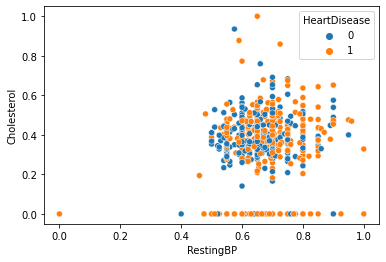

In [15]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['RestingBP'], y =X_train_scaled ['Cholesterol'],hue = 'HeartDisease', data = data) #viasualize the particular faetures after

In [16]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [17]:
from sklearn.svm import SVC #import the SVC model
from sklearn.calibration import CalibratedClassifierCV

In [54]:
svc_model = SVC()  #assin the SVC model 
svc_model = CalibratedClassifierCV(svc_model) 

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3) 

In [56]:
svc_model = CalibratedClassifierCV(grid) 
svc_model = svc_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 5/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 1/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 2/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 3/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 4/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 5/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END .............................C=100, gamma=0.001; total time=   0.0s
[CV 5/5] END .............................C=100, gamma=0.001; total time=   0.0s
[CV 1/5] END ............................C=100, gamma=0.0001; total time=   0.0s
[CV 2/5] END ............................C=100, gamma=0.0001; total time=   0.0s
[CV 3/5] END ............................C=100, gamma=0.0001; total time=   0.0s
[CV 4/5] END ............................C=100, gamma=0.0001; total time=   0.0s
[CV 5/5] END ............................C=100, gamma=0.0001; total time=   0.0s
[CV 1/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 2/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 3/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 5/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 1/5] END .................................C=100, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=100, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=100, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=100, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=100, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=100, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=100, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=100, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=100, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=100, gamma=0.1; total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ..................................C=10, gamma=1; total time=   0.0s
[CV 1/5] END ................................C=10, gamma=0.1; total time=   0.0s
[CV 2/5] END ................................C=10, gamma=0.1; total time=   0.0s
[CV 3/5] END ................................C=10, gamma=0.1; total time=   0.0s
[CV 4/5] END ................................C=10, gamma=0.1; total time=   0.0s
[CV 5/5] END ................................C=10, gamma=0.1; total time=   0.0s
[CV 1/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 2/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 3/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 4/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 5/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 1/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 2/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 3/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 4/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 5/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 1/5] END ...............

In [57]:
predictions = svc_model.predict(X_test_scaled) #testing the model

In [61]:
grid = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 5/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 1/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............

SVC(C=1000, gamma=0.001)

In [62]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [63]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix #import the performance evaluavtion matrices

In [65]:
print(classification_report(y_test,predictions))  #print the performance of the algo

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        73
           1       0.95      0.91      0.93       111

    accuracy                           0.92       184
   macro avg       0.91      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [66]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

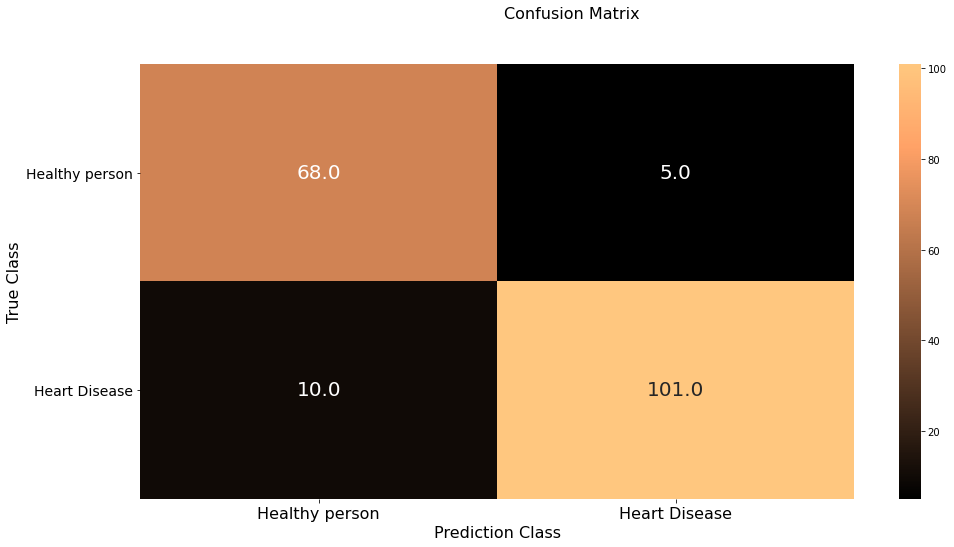

In [67]:
fig=plt.figure(figsize=(16,8))
xticklabel=['Healthy person','Heart Disease']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 20})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=16)
plt.xlabel("Prediction Class",fontsize=16)
plt.ylabel("True Class",fontsize=16)

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,svc_model.predict(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,svc_model.predict_proba(X_test_scaled)[:,1])

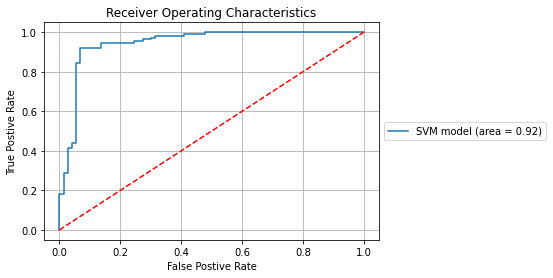

In [69]:
plt.figure()
plt.plot(fpr,tpr,label='SVM model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()